In [7]:
import sklearn
import pandas as pd

column_names = ['diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness','concavity','concave points','symmetry','fractal dimension']

wc = pd.read_csv('data/wdbc.data', names = column_names, usecols = [1]+[*range(22,32)]) #We are only interested in the second column (the diagnosis) and the last 10 columns, which are the real valued features 

wc.head()

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension
0,M,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
import seaborn as sns
import numpy as np
X_raw = wc.iloc[:, -10:].values # training data is the last ten features
y_raw = wc.iloc[:, 0].values
y = [1 if i == "M" else 0 for i in y_raw]

#x_norm = (X - X.min()) / (X.max() - X.min())
#X_norm = (X - X.min()) / (X.max() - X.min()) #min max normalisation
#x_norm = (x - x.mean()) / (x.max() - x.min()) #mean normalisation
X = (X_raw - X_raw.mean()) / X_raw.std() #standardization - must follow a gaussian distribution

np_X_raw = np.array(X_raw)
scaler = sklearn.preprocessing.StandardScaler().fit(np_X_raw)
X_scaled = scaler.transform(np_X_raw)
for column in X_scaled.T:
    sns.displot(column)

for column in column_names:
    sns.displot(wc.loc[:, column])

plt.close()


AttributeError: module 'sklearn' has no attribute 'preprocessing'

In [12]:
benign_df = pd.DataFrame(columns=column_names)
malignant_df = pd.DataFrame(columns=column_names)
for index, row in wc.iterrows():
    if row['diagnosis'] == "B":
        benign_df = benign_df.append(row)
    elif row['diagnosis'] == "M":
        malignant_df = malignant_df.append(row)

for column in column_names:
    fig, ax = plt.subplots()
    sns.histplot(benign_df.loc[:, column], ax=ax, color="skyblue")
    sns.histplot(malignant_df.loc[:, column], ax=ax, color="red")

Empty DataFrame
Columns: [diagnosis, radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension]
Index: []


NameError: name 'plt' is not defined

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

lin_regr = LinearRegression()
lin_regr.fit(X, y)

# predict all data points
lin_regr_pred = lin_regr.predict(X)



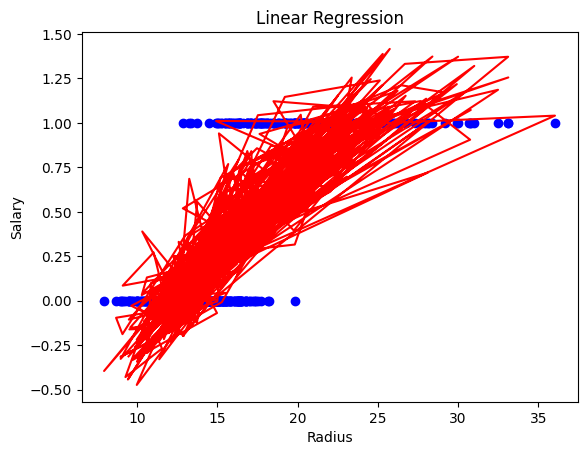

In [ ]:
rad = wc.loc[:, "radius"]
plt.scatter(rad, y, color='blue')

plt.plot(rad, lin_regr_pred, color='red')
plt.title('Linear Regression')
plt.xlabel('Radius')
plt.ylabel('Salary')

plt.show()